# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Redes Neuronales</center>

## <center> Introducción </center> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy import linspace

np.random.seed(1)

### Descenso por gradiente

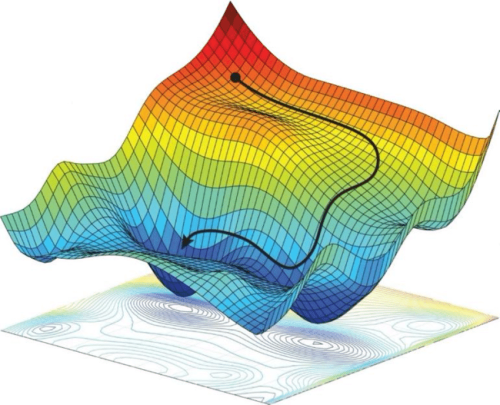

#### Ejemplo 

Hallar el mínimo de la siguiente función utilizando descenso por gradiente $$y = x^2 + 1$$

In [2]:
def descenso_gradiente(learning_rate,n_iteraciones):
    x_inicial = randint(10)

    iteraciones = []
    y = []

    x = x_inicial
    for i in range(n_iteraciones):
        #print('------------------------')
        #print('iteración ', str(i+1))

        # Calcular gradiente
        gradiente = 2*x

        # Actualizar "x" usando gradiente descendente
        x = x - learning_rate*gradiente

        # Almacenar iteración y valor correspondiente
        y_iteracion=x**2 + 1
        y.append(y_iteracion)
        iteraciones.append(i+1)
    
    return iteraciones,y

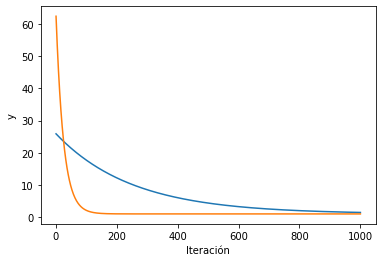

In [3]:
n_iteraciones = 1000

iteraciones1,y1=descenso_gradiente(0.001,n_iteraciones)
iteraciones2,y2=descenso_gradiente(0.01,n_iteraciones)

plt.plot(iteraciones1,y1)
plt.plot(iteraciones2,y2)
plt.xlabel('Iteración')
plt.ylabel('y')
plt.show()

## Feature Engineering

#### Redes Neuronales Maestría DM UBA

#### Visualización del Modelo de Regresión Lineal y la función de error cuadrático medio

Funciones auxiliares (solo ejecutar, y seguir más abajo)

In [1]:
###############################################################################
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
###############################################################################

def visualizar_superficie_error(ax_surface,x,y,m,b,mean_error):
    ax_surface.set_xlabel("m")
    ax_surface.set_ylabel("b")
    ax_surface.set_zlabel("E")
    ax_surface.set_title("Superficie de E(m,b) ")
    ax_surface.set_zticks([])
    detail=0.01
    param_range=12
    M = np.arange(-param_range, param_range, detail)
    B = np.arange(-param_range, param_range, detail)
    Ms, Bs = np.meshgrid(M, B)
    E=np.zeros_like(Ms)
    n=len(x)
    for i in range(n):
        Yi=Ms*x[i]+Bs
        E+=(Yi-y[i])**2
    E/=n
    surf = ax_surface.plot_surface(Ms,Bs,E, cmap=cm.coolwarm,alpha=0.5,linewidth=0, antialiased=False)
    ax_surface.scatter([m],[b],[mean_error*1.1],c="green",s=70)
    plt.colorbar(surf, shrink=0.5, aspect=5)    
    
            
def visualizar(x,y,m,b,y_predicted,errors,mean_error,new_x,new_y,ver_residuos,ver_nuevo_dato):
    # Visualizacion
    figure=plt.figure(figsize=(10,5),dpi=100)
    
    ax_surface=figure.add_subplot(1,1,1,projection='3d')
       
    visualizar_superficie_error(ax_surface,x,y,m,b,mean_error)
    
    plt.show()

###############################################################################


### Visualización del modelo y la superficie del error

El siguiente código carga un conjunto de datos, y luego crea un modelo de regresión lineal para predecir los valores de salida `y` en base a los de entrada `x` en base a la función `y=mx+b`.

Probá modificando los parámetros `m` y `b` del modelo, tratando de minimizar *a mano* el error. 

Observá como cambia la recta `mx+b` y qué tan bien se ajusta a los datos (izquierda) y al mismo tiempo cambia la posición de los parámetros en la función de error (bola verde/turquesa en la figura de la derecha).  

Notá que la forma de la superficie del error (un paraboloide) no cambia al modificar los parámetros (derecha). Lo que si cambia es la posición de los mismos en el espacio de todas las posibles combinaciones de `m` y `b`.


Luego de eso, entre el comentario `## COMIENZO NORMALIZAR` y `##FIN NORMALIZAR`, normalizá los datos de entrada `x` restándoles la media μ y dividiendo por la desviación estándar σ con la fórmula `x ← (x-μ)/σ`. Recordá que `x` es un vector de NumPy y por ende soporta los métodos `mean()` y `std()`. 

¿Cambia la superficie de la función de error resultante al normalizar?

<IPython.core.display.Javascript object>


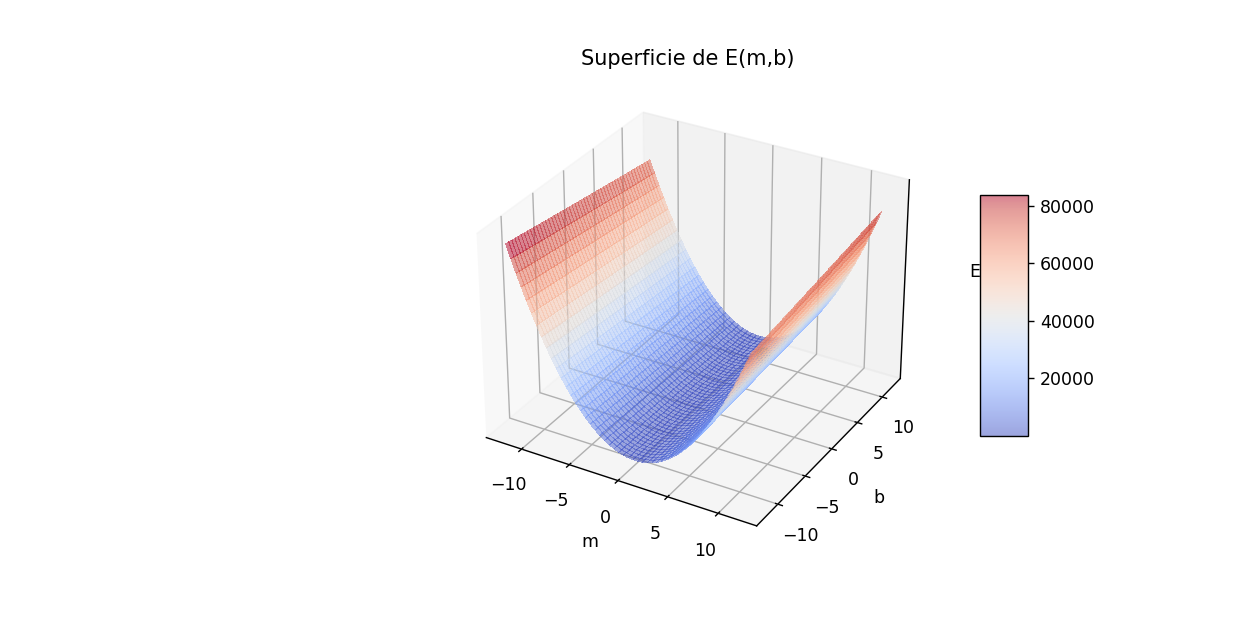

In [9]:
## Carga de datos
dataset_base=""
dataset="study_regression_small.csv"
# dataset="anscombe4.csv"
dataset_path=os.path.join(dataset_base,dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0],data[:,1]

## Parámetros del modelo (probar valores entre -0 y 10)
m=9
b=-4

# Cálculo de la salida o predicción del modelo para todos los ejemplos
y_predicted= x*m+b

#Calculo del error del modelo
errors= (y-y_predicted)**2
mean_error=errors.mean()

# Dato nuevo a evaluar
new_x=1
new_y=new_x*m+b

#Opciones de visualización (deshabilitar para ver mejor los datos)
ver_residuos=True
ver_nuevo_dato=True
#visualizar todo

visualizar(x,y,m,b,y_predicted,errors,mean_error,new_x,new_y,ver_residuos,ver_nuevo_dato)

<IPython.core.display.Javascript object>


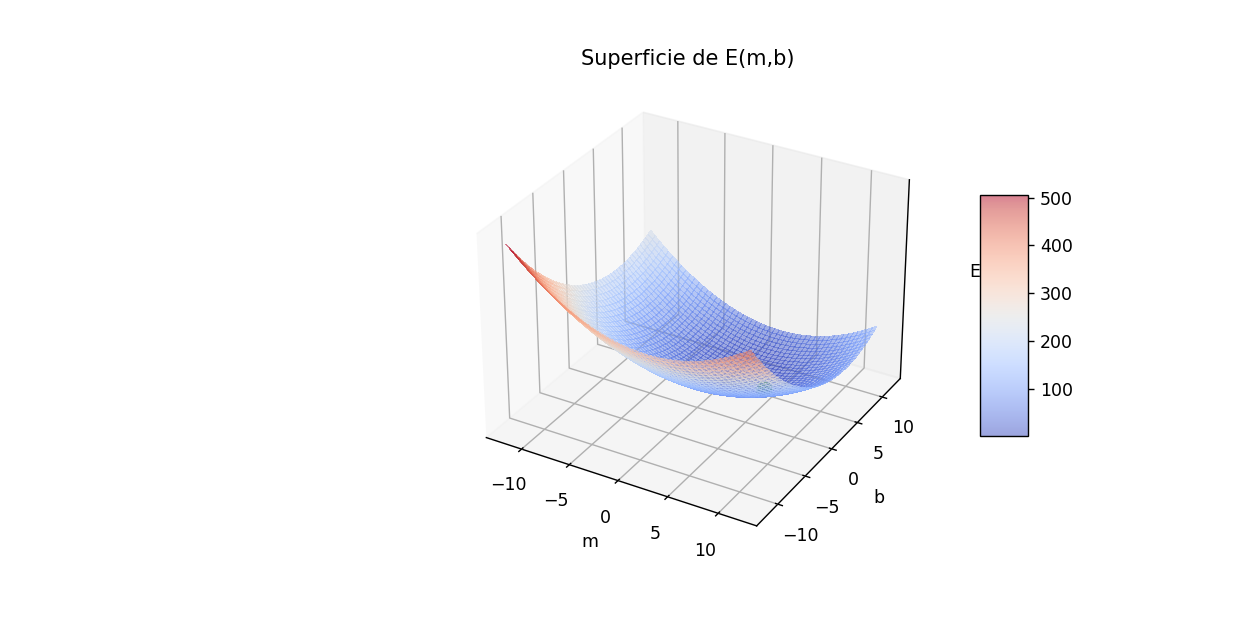

In [10]:
## Carga de datos
dataset_base=""
dataset="study_regression_small.csv"
dataset_path=os.path.join(dataset_base,dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0],data[:,1]

# Normalizo las variables de entrada
x=(x-x.mean())/x.std()

m=9

b=-4

# Cálculo de la salida o predicción del modelo para todos los ejemplos
y_predicted= x*m+b

#Calculo del error del modelo
errors= (y-y_predicted)**2
mean_error=errors.mean()

# Dato nuevo a evaluar
new_x=1
new_y=new_x*m+b

#Opciones de visualización (deshabilitar para ver mejor los datos)
ver_residuos=True
ver_nuevo_dato=True
#visualizar todo

visualizar(x,y,m,b,y_predicted,errors,mean_error,new_x,new_y,ver_residuos,ver_nuevo_dato)

### Tensorflow

https://www.tensorflow.org/

An end-to-end machine learning platform

TensorFlow offers multiple levels of abstraction so you can choose the right one for your needs. Build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine learning easy.

### Keras

https://keras.io/

Deep learning for humans.
Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides.